In [705]:
%pylab inline
import matplotlib
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [716]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)


# COM vs r

37
195.2662721893491 11.834319526627219
37
196.4497041420118 11.834319526627219
36
195.26627218934908 2.366863905325444


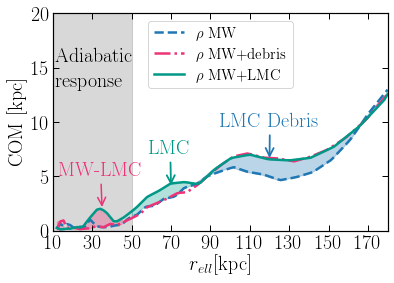

In [803]:
filenames = ["com_rho_mw_bfe.txt", "com_rho_mwlmcdebris_bfe.txt", "com_rho_mwlmc_bfe.txt", 'com_pot_mwlmc_bfe.txt', 
             'com_pot_mwdebris_bfe.txt']
names = [r"$\rho$ MW", r"$\rho$ MW+debris", r"$\rho$ MW+LMC", r"$\phi$ MW", r"$\phi$ MW+debris"]


lines = ['--', '-.', '-', ':', ':']
colors = ['#004488', '#DDAA33', '#BB5566']
colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
colors = ['C0', '#EE3377', '#009988', '#BBBBBB']

fig = plt.figure()
ax = plt.subplot(111)
for i in range(0, 3):
    data = np.loadtxt(filenames[i])
    print(len(data))
    xcom = data[:,0]
    ycom = data[:,1]
    zcom = data[:,2]
    r = data[:,3]
    print(r[0], r[-1])
    rcom = np.sqrt(xcom**2 + ycom**2 + zcom**2)
    f = interpolate.interp1d(r[::-1], rcom[::-1])
    r_new = np.linspace(12, 180, 100)
    rcom_new = f(r_new)
    index = np.where((r_new<80) & (r_new>50))
    index2 = np.where((r_new<45) & (r_new>12))
    index3 = np.where((r_new<175) & (r_new>80))

    if i == 0:
        rcom1 = np.copy(rcom_new)
        index1 = np.copy(index[0])
        index4 = np.copy(index2[0])
        index7 = np.copy(index3[0])

    elif i == 1:
        rcom2 = np.copy(rcom_new)
        index2 = np.copy(index[0])
        index5 = np.copy(index2[0])
        index8 = np.copy(index3[0])

    elif i == 2:
        rcom3 = np.copy(rcom_new)
        index3 = np.copy(index[0])
        index6 = np.copy(index2[0])
        index9 = np.copy(index3[0])

    ax.plot(r_new, rcom_new, label=names[i], c=colors[i], lw=2.5, ls=lines[i])
    
ax.legend(ncol=1, fontsize=15, loc='upper center')

ax.set_ylim(0, 20)
ax.set_xlim(10, 180)
ax.set_xticks(np.arange(10, 180, 20))
xlabel('$r_{ell}$[kpc]')
ylabel('COM [kpc]')
#axvline(100, c='k', ls='--', alpha=0.6)
plt.fill_between(np.array([0, 50]), 0, 20, alpha=0.3, color='C7')
plt.fill_between(np.array(np.linspace(50, 80, len(index1))), 
                 rcom1[index1], rcom3[index3], alpha=0.3, color='#009988')

plt.fill_between(np.array(np.linspace(12, 45, len(index4))), 
                 rcom2[index4], rcom3[index6], alpha=0.3, color='#EE3377')

plt.fill_between(np.array(np.linspace(80, 175, len(index7))), 
                 rcom1[index7], rcom3[index8], alpha=0.3, color='C0')


# Orbital barycetner.
# Line
#savefig('MW_COM_rho.pdf', bbox_inches='tight')
ax.annotate("MW-LMC", xy=(35, 2), xytext=(13, 5), 
            arrowprops=dict(arrowstyle="->", lw=1.5, color='#EE3377'), color='#EE3377')
ax.annotate("LMC", xy=(70, 4), xytext=(59, 7),
            arrowprops=dict(arrowstyle="->", lw=1.8, color='#009988'), color='#009988')
ax.annotate("LMC Debris", xy=(120, 6.5), xytext=(95, 9.5), arrowprops=dict(arrowstyle="->", lw=1.8, color='C0'), 
            color='C0')

ax.text(11, 15.5, "Adiabatic")
ax.text(11, 13.2, "response")
savefig('rcom_rell.pdf', bbox_inches='tight')

In [766]:
index8

array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93])

In [742]:
print(rcom1[index1], rcom3[index3])
print(len(index5), len(index6))

[1.35114447 1.47078802 1.73952522 2.07545054 2.22748974 2.25550668
 2.28352361 2.47263821 2.7001094  2.92465272 2.99102261 3.05739251
 3.1237624  3.31171567 3.60693699 3.90215832 4.04100544 4.12541116] [1.92114157 2.1843087  2.4871832  2.79005771 3.09293221 3.26590143
 3.42440962 3.58291781 3.75482575 3.94578412 4.13674248 4.32770085
 4.37175548 4.40407659 4.4363977  4.46871881 4.44032785 4.3908001 ]


TypeError: len() of unsized object

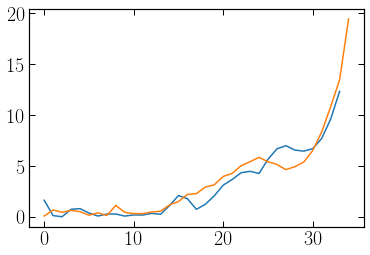

In [693]:
plot(rcom3[::-1][:-2])
plot(rcom1[::-1][:-2])

In [643]:
the systematic shif as a function of radii is due to the last 0.5 gyrs of interaciton with the LMC
not all the halo respond adiabatically to the pasage of the LMC only the inner 50 kpc region.

array([5.8514842 , 5.42796903, 5.03425427, 4.27271093])

(array([19, 20, 21, 22, 23]),)


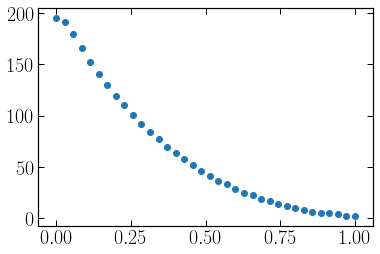

In [660]:
scatter(np.linspace(0, 1, len(r)), r)
index= np.where((r[::-1]<80) & (r[::-1]>50))
print(index)

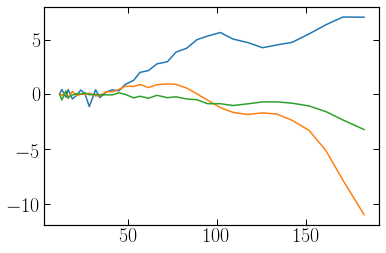

In [565]:
# filenames = ["com_rho_mw_bfe.txt", "com_rho_mwlmcdebris_bfe.txt", "com_rho_mwlmc_bfe.txt"]
names = [r"$\rho$ MW", r"$\rho$ MW+debris", r"$\rho$ MW+LMC"]
lines = ['--', '-.', '-']
colors = ['k', 'C0', 'C3']
fig = plt.figure()
ax = plt.subplot(111)
#for i in range(len(names)):
for i in range(0, 1):
    data = np.loadtxt(filenames[i])
    xcom = data[3:,0]
    ycom = data[3:,1]
    zcom = data[3:,2]
    r = data[3:, 3]
    plot(r, zcom)
    plot(r, ycom)
    plot(r, xcom)

37
30
30
30
30
29
29
29


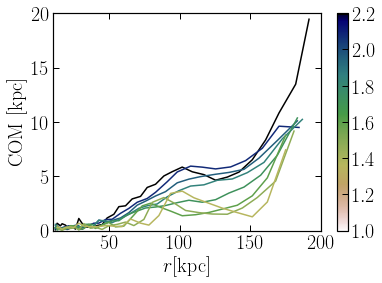

In [832]:
filenames = ["com_rho_mw_bfe.txt", "com_rho_mwlmc_bfe_107.txt", 
             "com_rho_mwlmc_bfe_105.txt", "com_rho_mwlmc_bfe_103.txt",
             "com_rho_mwlmc_bfe_100.txt", "com_rho_mwlmc_bfe_95.txt",
             "com_rho_mwlmc_bfe_91.txt", "com_rho_mwlmc_bfe_85.txt",
             "com_rho_mwlmc_bfe_75.txt", "com_rho_mwlmc_bfe_50.txt"]
names = [r"$\rho$ MW", r"$\rho$ MW+debris", r"$\rho$ MW+LMC", r"$\phi$ MW", r"$\phi$ MW+debris"]


lines = ['--', '-.', '-', ':', ':']
colors = ['#004488', '#DDAA33', '#BB5566']
colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
colors = ['C0', '#EE3377', '#009988', '#BBBBBB']
colors = plt.cm.gist_earth(np.linspace(0.0,0.9,len(filenames)))
lws = np.linspace(2.5, 0.5, 11)
fig = plt.figure()
ax = plt.subplot(111)
for i in range(0, 8):
    data = np.loadtxt(filenames[i])
    print(len(data))
    xcom = data[:,0]
    ycom = data[:,1]
    zcom = data[:,2]
    r = data[:,3]
    rcom = np.sqrt(xcom**2 + ycom**2 + zcom**2)
    ax.plot(r[2:], rcom[2:], c=colors[i], lw=1.5)
ax.legend(ncol=1, fontsize=15, loc='upper center')
ylim(0, 20)
xlim(10, 200)
xlabel('$r$[kpc]')
ylabel('COM [kpc]')
#axvline(100, c='k', ls='--', alpha=0.6)
#plt.fill_between(np.array([0, 50]), 0, 20, alpha=0.3, color='C7')
#plt.fill_between(np.array([70, 150]), , 20, alpha=0.3, color='C7')

# Orbital barycetner.
# Line
#savefig('MW_COM_rho.pdf', bbox_inches='tight')
axvline(rlmc[50])
sm = plt.cm.ScalarMappable(cmap='gist_earth_r', norm=plt.Normalize(vmin=50*0.02, vmax=110*0.02))
sm._A = []
colorbar(sm)

In [810]:
1/0.02

50.0

## Reflex motion 

In [392]:
MW5_com = np.loadtxt('../../../MW_anisotropy/data/orbits/LMC5_100Mb1_orbit.txt')
MW4_com = np.loadtxt('../../../MW_anisotropy/data/orbits/LMC4_100Mb1_orbit.txt')
MW3_com = np.loadtxt('../../../MW_anisotropy/data/orbits/LMC3_100Mb1_orbit.txt')
MW6_com = np.loadtxt('../../../MW_anisotropy/data/orbits/LMC6_100Mb1_orbit.txt')

#MW_com2 = np.loadtxt('../../../MW_anisotropy/data/orbits/LMC5_100Mb0_orbit.txt')

In [380]:
MW_xcom= MW5_com[:,0]
MW_ycom= MW5_com[:,1]
MW_zcom= MW5_com[:,2]

LMC_xcom= MW5_com[:,6]
LMC_ycom= MW5_com[:,7]
LMC_zcom= MW5_com[:,8]

In [381]:
rlmc = np.sqrt((LMC_xcom-MW_xcom)**2 + (LMC_ycom-MW_ycom)**2 + (LMC_zcom-MW_zcom)**2)

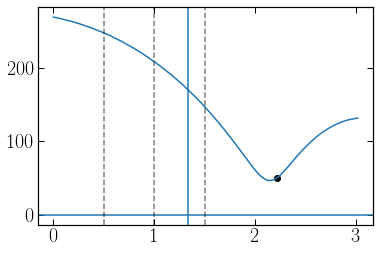

In [384]:
t = np.linspace(0, len(MW_xcom), len(MW_xcom))*0.02 
plot(t, rlmc)
axhline(0)
axvline(1.34)
axvline(0.5, c='k', ls='--', label='$t_{peri}$', alpha=0.5)
axvline(1, c='k', ls='--', label='$t_{peri}$', alpha=0.5)
axvline(1.5, c='k', ls='--', label='$t_{peri}$', alpha=0.5)
scatter(t[110], rlmc[110], c='k')

In [857]:
import mwlmc_denity_shape_bfe as shape
import jellyfish

In [840]:
rho, xrho, yrho, zrho = shape.load_data('../rho_mwlmc_bfe_5000000_r_0.txt')

In [947]:
rho_contours, r_ell, N_dots = shape.compute_density_contour(rho, 30, xrho, yrho, zrho, rmax=600, N_min=200)



/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:88: RuntimeWarning: invalid value encountered in greater_equal
  index_dens = np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low) & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))[0]
/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:88: RuntimeWarning: invalid value encountered in less_equal
  index_dens = np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low) & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))[0]


contour at [178.69822485 178.69822485 178.69822485 ... 200.         200.
 200.        ] with 168061 points
contour at [157.3964497 157.3964497 157.3964497 ... 200.        200.
 200.       ] with 469011 points
contour at [140.82840237 140.82840237 140.82840237 ... 185.79881657 185.79881657
 185.79881657] with 429877 points
contour at [127.81065089 127.81065089 127.81065089 ... 168.04733728 168.04733728
 168.04733728] with 379018 points
contour at [115.97633136 115.97633136 115.97633136 ... 150.29585799 150.29585799
 150.29585799] with 348838 points
contour at [105.32544379 105.32544379 105.32544379 ... 133.72781065 133.72781065
 133.72781065] with 327181 points
contour at [ 95.85798817  95.85798817  95.85798817 ... 119.52662722 119.52662722
 119.52662722] with 302938 points
contour at [ 87.5739645   87.5739645   87.5739645  ... 105.32544379 105.32544379
 105.32544379] with 271664 points
contour at [80.47337278 80.47337278 80.47337278 ... 94.67455621 94.67455621
 94.67455621] with 243462

In [995]:
def plot_contour(rell, contours, x, y, z):
    data_2d_all = []
    fit_2d_all = []
    R = []
    fig, ax = subplots(1,1, figsize=(4.5,4.5))
    index = np.where(rell>=26)
    print(index)
    for i in range(1,len(rell)):
        R.append(r_ell[i])
        eigves_rho, axis_rho, sr, qr = shape.compute_halo_shape(contours[i], x, y, z)
        #print('Done computing density halo shape')
        #index_maxp = np.argmax(N_dotsp)
        pos_ell = jellyfish.ellipse_3dcartesian(axis_rho, eigves_rho)
        data_2d, fit_2d = shape.twod_fits_plot(x[contours[i]], y[contours[i]], z[contours[i]], pos_ell[:,:,0].flatten(), pos_ell[:,:,1].flatten(), pos_ell[:,:,2].flatten())
        data_2d_all.append(data_2d)
        if i <= index[0][-1]:
            if i==1:
                ax.plot(data_2d[4], data_2d[5], lw=1.5, label='Non adiabatic', ls='-', c=colors[2], alpha=1)
            else:
                ax.plot(data_2d[4], data_2d[5], lw=1.5, ls='-', c=colors[2], alpha=1)
        else:
            if i==20:
                ax.plot(data_2d[4], data_2d[5], lw=1.5, label='Adiabatic', ls='-', c='#EE3377', alpha=1)
            else:
                ax.plot(data_2d[4], data_2d[5], lw=1.5,  ls='-', c='#EE3377', alpha=1)

    ax.legend(fontsize=15)
    ax.set_xticks(np.arange(-200, 201, 100))
    ax.set_yticks(np.arange(-200, 201, 100))
    ax.minorticks_on()
    ax.set_xlabel('y[kpc]')
    ax.set_ylabel('z[kpc]')
    ax.set_xlim(-250, 250)
    ax.set_ylim(-250, 250)
    ax.scatter(-41, -28, c='k', marker='*', s=80)
    savefig('LMCMW_contours_adiabatic.pdf', bbox_inches='tight')
    return 0 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),)
(0.909909340928725+0j) (0.9801661005420442+0j)


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:632: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


(0.9711634965988956+0j) (0.9815324849041234+0j)
(0.9813076336226395+0j) (0.9829273203885036+0j)
(0.9807308758878132+0j) (0.9911576410507422+0j)
(0.9835033890059083+0j) (0.9968297265471598+0j)
(0.9699158558734707+0j) (0.9768200071958297+0j)
(0.9407999943723347+0j) (0.960351079873785+0j)
(0.9148607617452049+0j) (0.9386266698625393+0j)
(0.8971453328572854+0j) (0.9321692748817143+0j)
(0.8940401348969342+0j) (0.9370020280415083+0j)
(0.8786130748697527+0j) (0.9322671988765036+0j)
(0.8840092622203791+0j) (0.9227241524942797+0j)
(0.9062220169890002+0j) (0.9185605895107026+0j)
(0.9042546260412239+0j) (0.939663003668395+0j)
(0.8699319423597988+0j) (0.9091984506645187+0j)
(0.8652029671989465+0j) (0.90934236972416+0j)
(0.9134374497598075+0j) (0.9309028870940126+0j)
(0.9758846726134625+0j) (0.9850290928904756+0j)
(0.8894489822697342+0j) (0.9546210420676026+0j)
(0.9371831485752226+0j) (0.9870594975951439+0j)
(0.9370449857651294+0j) (0.9831816331394725+0j)
(0.8269633933244741+0j) (0.8510067432638013+

0

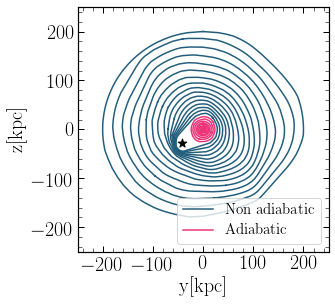

In [996]:
plot_contour(np.array(r_ell), rho_contours, xrho, yrho, zrho)

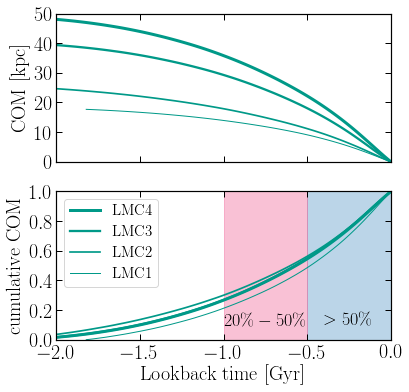

In [525]:
MW_coms = [MW6_com, MW5_com, MW4_com, MW3_com]

fig, ax = plt.subplots(2,1,figsize=(6, 6), sharex=True)

lws = [3, 2.3, 1.7, 1]
final = [111, 110, 115, 91]
for i in range(len(MW_coms)):
    MW_xcom= MW_coms[i][:final[i],0]
    MW_ycom= MW_coms[i][:final[i],1]
    MW_zcom= MW_coms[i][:final[i],2]

    #LMC_xcom= MW5_com[:,6]
    #LMC_ycom= MW5_com[:,7]
    #LMC_zcom= MW5_com[:,8]
    t1 = np.linspace(0, len(MW_xcom), len(MW_xcom))*0.02 * (-1)
    t2 = np.linspace(0, len(MW_xcom), len(MW_xcom))*0.02 


    #plot(t[:110], MW_xcom[:110]-MW_xcom[0], label='$\hat{x}$')
    #plot(t[:110], MW_ycom[:110]-MW_ycom[0], label='$\hat{y}$')
    #plot(t[:110], MW_zcom[:110]-MW_zcom[0], label='$\hat{z}$')

    #axvline(1.35, c='k', ls='--', label='$t_{peri}$')
    #axvline(2.1, c='k', ls='--', label='$t_{peri}$')

    #axvline(0.5, c='k', ls='--', label='$t_{peri}$', alpha=0.5)
    #axvline(1, c='k', ls='--', label='$t_{peri}$', alpha=0.5)
    #axvline(1.5, c='k', ls='--', label='$t_{peri}$', alpha=0.5)
    rcom = np.sqrt(MW_xcom**2 + MW_ycom**2 + MW_zcom**2)
    ax[0].plot(t1, rcom[-1]-rcom[::-1], c='#009988', lw=lws[i], label='LMC{}'.format(4-i))
    
    ax[1].plot((t2[0]-t2)[::-1], (rcom-rcom[0])/np.max(rcom-rcom[0]), c='#009988', lw=lws[i], label='LMC{}'.format(4-i))
    #legend()
ax[0].set_ylim(0, 50)
ax[0].set_xlim(-2, 0)
ax[1].set_xlim(-2, 0)
ax[1].set_ylim(0, 1)


ax[1].set_xlabel('Lookback time [Gyr]')
ax[0].set_ylabel('COM [kpc]')
ax[1].set_ylabel('cumulative COM')

plt.legend(fontsize=15)
ax[0].set_yticks([0, 10, 20, 30, 40, 50])
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

ax[1].fill_between(np.array([-0.5, 0]), 0, 1, alpha=0.3)
ax[1].fill_between(np.array([-1, -0.5]), 0, 1, alpha=0.3, color='#EE3377')
ax[1].text(-0.4, 0.1, '$>50\%$', fontsize=18)
ax[1].text(-1, 0.1, '$20\%-50\%$', fontsize=18)

#ax.set_xticklabels(['2', '1.5', '1', '0.5', '0'])
savefig('LMC_com_time.pdf', bbox_inches='tight')
# add peri and north to south crossing point 

# Barycenter

In [105]:
pot_mwlmc = np.loadtxt('../pot_mwlmc_bfe_5000000_r_0.txt')

In [106]:
shape(pot_mwlmc)

(4913000, 4)

In [148]:
pot = pot_mwlmc[:,0]
rpot = np.sqrt(pot_mwlmc[:,1]**2 + pot_mwlmc[:,2]**2 + pot_mwlmc[:,3]**2)

In [142]:
index = np.where(isnan(pot)==False)

In [200]:
pot_clean = pot[index]
rpot_clean = rpot[index]
xyz_clean = pot_mwlmc[index[0], 1:4]

In [219]:
rcut = np.where(rpot_clean<70)

In [220]:
np.min(rpot_clean)

1.1834319526627215

In [221]:
print(np.min(pot_clean[rcut[0]]), np.max(pot_clean[rcut]))

-12.162641523988608 -1.9313557972074655


In [222]:
print(xyz_clean[rcut][np.argmin(pot_clean[rcut])])
print(xyz_clean[rcut][np.argmax(pot_clean[rcut])])

[ 0.06554513 -1.17410098  0.13304856]
[ 13.01604901  57.37811728 -37.5967228 ]


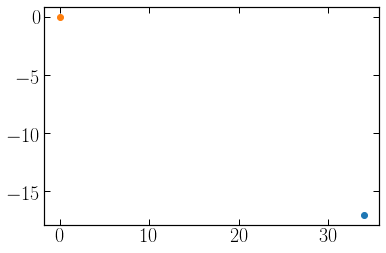

In [223]:
scatter(34, -17)
scatter(0,0)

In [209]:
sqrt(48.24333923**2 +  52.45771301**2 +113.15430132**2)

133.72781065103

(array([  28900.,       0.,   28900.,       0.,   28900.,       0.,
          28900.,   28900.,       0.,   28900.,   28900.,   28900.,
          28900.,   28900.,   30626.,   49082.,   38193.,   55929.,
          59071.,   68067.,   83266.,   96816.,  123311.,  150913.,
         194109.,  246490.,  346408.,  511352.,  848549., 1692918.]),
 array([-12.16264152, -11.78057155, -11.39850157, -11.0164316 ,
        -10.63436162, -10.25229164,  -9.87022167,  -9.48815169,
         -9.10608171,  -8.72401174,  -8.34194176,  -7.95987178,
         -7.57780181,  -7.19573183,  -6.81366186,  -6.43159188,
         -6.0495219 ,  -5.66745193,  -5.28538195,  -4.90331197,
         -4.521242  ,  -4.13917202,  -3.75710205,  -3.37503207,
         -2.99296209,  -2.61089212,  -2.22882214,  -1.84675216,
         -1.46468219,  -1.08261221,  -0.70054223]),
 <a list of 30 Patch objects>)

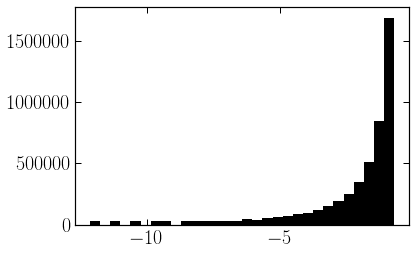

In [207]:
contours_110 = np.loadtxt('./rh')

In [997]:
from astropy import units as u

In [1000]:
vlmc = (20*u.kpc)/(0.5*u.Gyr)

In [1001]:
vlmc.to(u.km/u.s)

<Quantity 39.11168887 km / s>